In [2]:
import numpy as np                           # Import numpy
import pandas as pd                          # Import pandas

import matplotlib.pyplot as plt              # Import matplotlib

#Control font type
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42            # Ensure fonts will be editable as fonts in Illustrator
mpl.rcParams["font.family"] = "sans-serif"   # Use san-serif font in plots


# Customizing scatterplots

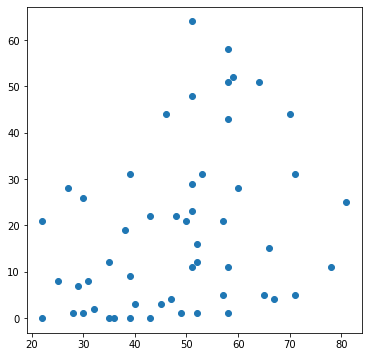

In [3]:
# Read in data, dataframe 
mD = pd.read_csv("metadata.tsv", sep="\t", header=0)

fig,ax = plt.subplots(1,1,figsize=(6,6))

# Basic
ax.scatter(mD["Age"], mD["SARS2Peps"])
#ax.set_xlabel("Donor Age", fontsize=25)
#ax.set_ylabel("Enriched SARS-CoV-2 Peptides", fontsize=25)


# Modify color, all points the same
#ax.scatter(mD["Age"], mD["SARS2Peps"], c="violet")

# Color based on a categorical variable, list of colors
#colors = ["blue" if x=="M" else "orange" for x  in mD["Sex"]]
#print(colors)
#ax.scatter(mD["Age"], mD["SARS2Peps"], c=colors)

# Modify size of all markers, "The marker size in points**2"
#ax.scatter(mD["Age"], mD["SARS2Peps"], c=colors, s=5)       # Smaller
#ax.scatter(mD["Age"], mD["SARS2Peps"], c=colors, s=100)       # Larger

# Scale size by some quantitative variable
#ax.scatter(mD["Age"], mD["SARS2Peps"], c=colors, s=[x**1.5 for x in mD["Age"]], alpha=0.5)

# Modify the shape of the markers, all the same
# Marker options = https://matplotlib.org/stable/api/markers_api.html
# ax.scatter(mD["Age"], mD["SARS2Peps"], c=colors, marker="d")

# Modify the shape of the markers, different shapes for different groups
# This needs to be done with separate calls to .scatter() for each shape

mD_male = mD[mD["Sex"]=="M"]    # Dataframe with only males
#mD_female = mD[mD["Sex"]=="F"]  # Dataframe with only females
#ax.scatter(mD_male["Age"], mD_male["SARS2Peps"], c="blue", marker="^")
#ax.scatter(mD_female["Age"], mD_female["SARS2Peps"], c="orange", marker="o")


# Add legend
#ax.scatter(mD_male["Age"], mD_male["SARS2Peps"], c="blue", marker="^", label="Male")
#ax.scatter(mD_female["Age"], mD_female["SARS2Peps"], c="orange", marker="o", label="Female")

#ax.legend(loc='best', fontsize=20)
#ax.legend(loc='upper left', fontsize=20)
#ax.legend(loc='lower left', fontsize=20)

# Custom labels with .text()
# Dy default, the position should be given in data coordinates
#ax.text(25,60, "Male", fontsize=25, color="blue")
#ax.text(25,54, "Female", fontsize=25, color="orange")



In [4]:
pd.notnull(mD["Sex"])

cat = "Sex"

mD.Sex == mD["Sex"]

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
20    True
21    True
22    True
23    True
24    True
25    True
26    True
27    True
28    True
29    True
30    True
31    True
32    True
33    True
34    True
35    True
36    True
37    True
38    True
39    True
40    True
41    True
42    True
43    True
44    True
45    True
46    True
47    True
48    True
49    True
50    True
51    True
52    True
Name: Sex, dtype: bool

# [Color maps](https://matplotlib.org/3.5.1/tutorials/colors/colormaps.html)

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(7,6))

# Color with colormap based on quantitative variable
sp = ax.scatter(mD["Age"], mD["SARS2Peps"], c=mD["Days from PCR diagnosis"], cmap="viridis")
#sp = ax.scatter(mD["Age"], mD["SARS2Peps"], c=mD["Days from PCR diagnosis"], cmap="plasma")

#cbar = fig.colorbar(sp)
#cbar.set_label('Days from PCR diagnosis', fontsize=20)

ax.set_xlabel("Donor Age", fontsize=25)
ax.set_ylabel("Enriched SARS-CoV-2 Peptides", fontsize=25)


# Heat map

In [ ]:
# Read in data, dataframe 
allDF = pd.read_csv("heatmap_data.tsv", sep="\t", header=0)

# Create df with just data to plot
dataDF = allDF[allDF.columns[4:]]

# Initiate canvas
fig,ax = plt.subplots(figsize=(9,4),facecolor='w')

# Set x-axis label
ax.set_xlabel("Hemagglutinin subtype", fontsize=22)

# Plot heat map
im = ax.imshow(dataDF, cmap='plasma', aspect='auto')

# Generate list with y tick labels
yLabels = []
for index, row in allDF.iterrows():
    yLabels.append(f"{row['HAtype']} | {row['Host']} | {row['CaptureProtein']}")

# Modify y tick labels
ax.set_yticks(range(10))
ax.set_yticklabels(yLabels, fontsize=14)

# Modify y tick labels
ax.set_xticks(range(14))
ax.set_xticklabels(allDF.columns[4:], fontsize=14)

# Generate color bar
cbar = fig.colorbar(im)
cbar.set_label('Relative enrichment', fontsize=20)

# Save figure
#plt.savefig('FluA-HA_realtiveEnrichment.png',dpi=200,bbox_inches='tight')
#plt.savefig('FluA-HA_realtiveEnrichment.pdf',bbox_inches='tight')


# Map

In [ ]:
# Read in points representing "centers" of districts, provided as lat and lon
df = pd.read_csv('SLE_district_centroids.txt', index_col=0, sep="\t", header=None, names = ["Longitude", "Latitude"])

In [ ]:
df

In [ ]:
# Read in district polygons
json=pd.read_json("SLE_v3.geojson") ## load data

In [ ]:
json

In [ ]:
# Initialize canvas
fig,ax = plt.subplots(figsize=(10,10),facecolor='w')

## iterate through features (locations)
for loc in json['features']: 
    pc = np.array(loc['geometry']['coordinates'], dtype=object) ## get coordinates

    location=loc['properties']['location'] ## standardised location name
    if loc['geometry']['type']=='MultiPolygon': ## multiple parts detected
        for part in pc:
            for coords in part:
                poly=plt.Polygon(coords,facecolor='#2ca25f',edgecolor='black')
                ax.add_patch(poly)

        # Add location label
        #ax.text(df["Longitude"][location], df["Latitude"][location], location, ha='center')

    if loc['geometry']['type']=='Polygon': ## location is single part
        for coords in pc:
            poly=plt.Polygon(coords,facecolor='#2ca25f',edgecolor='white')
            ax.add_patch(poly)
        
        # Add location label
        #ax.text(df["Longitude"][location], df["Latitude"][location], location, ha='center')


# Need to change axes limits to see polygons
ax.set_ylim([6.6,10.2])
ax.set_xlim([-13.7,-10])


# Hide axes
# plt.axis('off')

